# 分类模型
## 0. 统计指标
## 1. 数据探索
### 1.1 数据状况
### 1.2 训练集/测试集打标签法
## 2. 特征处理
### 2.1 查看数据类型
### 2.2 数据可视化
### -----重要部分，需要添加
## 3. baseline
### -- 添加NN
## 4. 参数调节
### 4.1 学习曲线
### 4.2 自动调参
## 5. 模型集成
### -- 需要添加
## 6. 模型持久化

### ----------------------------------------------------------------------------------


## 0. 统计指标
1. 分段统计函数
* `segment_statistic(y_test=None, prob_y=None, bins=None)`

2. 二分类评估指标
* `binary_classifier_metrics(test_labels, predict_labels, predict_prob, show_flag=True)`
* 简单版

3. 结果展示
* `show_feature_importance` Lightgbm特征重要性
* `plt_feature_importance` 
* `plot_heatmap` 相关系数热力图
* `create_roc` AUC可视化

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, average_precision_score
# 二分类评估指标
# roc_auc_score = roc_curve + auc
# test_labels: true label
# predict_labels: predict lables
# predict_prob: predict output is prob
def binary_classifier_metrics(test_labels, predict_labels, predict_prob, show_flag=True):  # 评价标准
    accuracy = accuracy_score(test_labels, predict_labels)  # accuracy_score准确率
    precision = precision_score(test_labels, predict_labels)  # precision_score精确率
    recall = recall_score(test_labels, predict_labels)  # recall_score召回率
    f1_measure = f1_score(test_labels, predict_labels)  # f1_score  f1得分
    confusionMatrix = confusion_matrix(test_labels, predict_labels)  # confusion_matrix  混淆矩阵
    fpr, tpr, threshold = roc_curve(test_labels, predict_prob, pos_label=1)  # roc_curve ROC曲线
    Auc = auc(fpr, tpr) 
    MAP = average_precision_score(test_labels, predict_prob)  # average_precision_score

    TP, FP, FN, TN = confusionMatrix[1, 1], confusionMatrix[0, 1], confusionMatrix[1, 0], confusionMatrix[0, 0]
    if show_flag is True:
        print("------------------------- ")
        print("row: precision | col: recall ")
        print("confusion matrix:")
        print("------------------------- ")
        print("| TP: %5d | FP: %5d | P: %5d |" % (TP, FP, TP+FP))
        print("----------------------- ")
        print("| FN: %5d | TN: %5d | R: %.3f|" % (FN, TN, (TP+FP)/len(test_labels)))
        print("----------------------- ")
        print("| T: %5d  | R: %.3f | N: %5d |" % (TP+FN, (TP+FN)/len(test_labels), len(test_labels)))
        print(" ------------------------- ")
        print("Accuracy:       %.2f%%" % (accuracy * 100))
        print("Precision:      %.2f%%" % (precision * 100))
        print("Recall:         %.2f%%" % (recall * 100))
        print("F1-measure:     %.2f%%" % (f1_measure * 100))
        print("AUC:            %.2f%%" % (Auc * 100))
        print("MAP:            %.2f%%" % (MAP * 100))
        print("------------------------- ")
    return recall, precision, f1_measure

def binary_classifier_metrics(test_labels, predict_labels, predict_prob):  # 评价标准
    accuracy = accuracy_score(test_labels, predict_labels)  # accuracy_score准确率
    precision = precision_score(test_labels, predict_labels)  # precision_score精确率
    recall = recall_score(test_labels, predict_labels)  # recall_score召回率
    f1_measure = f1_score(test_labels, predict_labels)  # f1_score  f1得分
    auc = roc_auc_score(test_labels, predict_prob)
    print("Accuracy:       %.2f%%" % (accuracy * 100))
    print("Precision:      %.2f%%" % (precision * 100))
    print("Recall:         %.2f%%" % (recall * 100))
    print("F1-measure:     %.2f%%" % (f1_measure * 100))
    print("AUC:            %.2f%%" % (auc * 100))
    
# 分段统计函数
# y_test: ture label
# pro_y: predict probability
def segment_statistic(y_test=None, prob_y=None, bins=None):
    if bins is None:
        bins = np.arange(0, 1.1, 0.1)
    new_df = pd.DataFrame({'y_true': y_test, 'prob_y':prob_y})
    new_df['bins'] = pd.cut(new_df['prob_y'], bins)
    stra_df = new_df.groupby('bins').agg({'bins':'count', 'y_true':'sum'})
    stra_df.rename(columns={'bins':'pred_cnt', 'y_true':'real_unsat_cnt'}, inplace=True)
    stra_df = stra_df.sort_index(ascending=False)
    stra_df['pred_unsat_cnt_p'] = stra_df['pred_cnt'].cumsum()
    stra_df['recall_preson'] = stra_df['pred_unsat_cnt_p'] / stra_df['pred_cnt'].sum()
    stra_df['real_unsat_cnt_tp'] = stra_df['real_unsat_cnt'].cumsum()
    stra_df['recall'] = stra_df['real_unsat_cnt_tp'] / stra_df['real_unsat_cnt'].sum()
    stra_df['precision'] = stra_df['real_unsat_cnt_tp'] / stra_df['pred_unsat_cnt_p']
    return stra_df

# 1. the importance of feature 
feature_imp = list()
for i in range(0, importances.shape[0]//5):
    m_df = list()
    m_df.append(importances.iloc[i,:].feature)
    m_df += list(importances.loc[[i]].mean().values)
    feature_imp.append(m_df)
imp_df = pd.DataFrame(feature_imp, columns=['feature', 'split', 'gain', 'fold'])
sort_imp_df = imp_df.sort_values(by=['gain'], ascending=False)
sort_imp_df[sort_imp_df.gain>20]

# 2. the importance of feature
def show_feature_importance(model, usage_col):
    import_df = pd.DataFrame()
    import_df['feature'] = usage_col
    import_df['split'] = model.feature_importance()
    import_df['gain'] = model.feature_importance(importance_type='gain')
    import_df = import_df.sort_values(by=['gain'], ascending=False)
    return import_df

def plt_feature_importance(model):
    lgb.plot_importance(model, ax=ax, 
                        title='Feature Importance', 
                        xlabel='Information Gain', 
                        ylabel='Feature Name', 
                        importance_type='gain', 
                        max_num_features=10, 
                        grid=False, 
                        precision=3, 
                        height=0.6)

# 解决余弦相似度计算值缺失的问题
# 去中心化的余弦相似度计算
# 1. 相关系数取值一般在-1~1之间
# 2. 绝对值越接近1说明变量之间的线性关系越强，绝对值越接近0说明变量间线性关系越弱。
# 3. ≥0.8高度相关，0.5~0.8中度相关，0.3~0.5低度相关，＜0.3相关关系极弱可视为不相关。
def plot_heatmap(dataframe):
    """
    """
    corr_df = dataframe
    mcorr = corr_df.corr(method="spearman")  

    ax = plt.subplots(figsize=(30, 25)) #调整画布大小
    mask = np.zeros_like(mcorr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 颜色分布
    ax = sns.heatmap(mcorr, mask=mask, cmap=cmap, annot=True, fmt='.1f')#画热力图   annot=True 

# visualization AUC
# AUC可视化
import matplotlib.pyplot as plt
def create_roc(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC Validation')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

NameError: name 'importances' is not defined

## 1. 数据探索

### 1.1 数据准备

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 读取数据
def read_data(name=None, source_path=None):
    if name is None:
        print('Source data NA. GG')
    elif name == 'dsId':
        return ds.load(source_path)
    elif name == 'df':
        return pd.read_csv(source_path, sep='\t')
    return 0

import pandas as pd
data_dir = 'C:/ZhangLI/Codes/DataSet/个人违贷/official_data/'
origin_train = pd.read_csv(data_dir+'train_public.csv')
origin_test = pd.read_csv(data_dir+'test_public.csv')

### 1.1 数据概述

In [33]:
# 查看数据维度
def describe_data(train, test):
    print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
    print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')
    print('-' * 50)
    # 查看哪些列具有缺失值
    print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')
    print(f'The train missing column: {train.columns[train.isna().any()].tolist()}.')
    for i in train.columns[train.isna().any()].tolist():
        print(f'The missing rate of \'{i}\' is {round((train[i].isna().sum() / train.shape[0])*100, 2)}%')
    print(f'There are {test.isnull().any().sum()} columns in test dataset with missing values.')
    print(f'The test missing column: {test.columns[test.isna().any()].tolist()}.')
    for i in test.columns[test.isna().any()].tolist():
        print(f'The missing rate of \'{i}\' is {round((test[i].isna().sum() / test.shape[0])*100, 2)}%')
    # 查看数据值唯一的列
    one_value_cols = []
    one_value_cols += [col for col in train.columns if train[col].nunique() <= 1]
    one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
    print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
    print(f'{one_value_cols} of unique values in the train set')
    print(f'There are {len(one_value_cols_test)} columns in test dataset with one unique value.')
    print(f'{one_value_cols_test} of unique values in the test set')
    print('-' * 50)
    # 查看数据缺失值情况
    nan_cols = [col for col in train.columns if train[col].isna().sum() / train.shape[0] > 0.90]
    print(f'There are {len(nan_cols)} columns in train dataset with [na value > 0.9].')
    print(f'The columns name is {nan_cols}')
    nan_clos_test = [col for col in test.columns if test[col].isna().sum() / test.shape[0] > 0.90]
    print(f'There are {len(nan_clos_test)} columns in test dataset with [na value > 0.9].')
    print(f'The columns name is {nan_clos_test}')
    print('-' * 50)
    # 列类型
    numerical_col = list(train.select_dtypes(exclude=['object']).columns)
    category_col = list(filter(lambda x: x not in numerical_col,list(train.columns)))
    print(f'The numerical columns is: {numerical_col}')
    print(f'The category columns is: {category_col}')
    return one_value_cols + nan_clos

describe_data(origin_train, origin_test)

# 查看数据类型
print('The train dtype:')
origin_train.dtypes
# 查看缺失值并排序
origin_train.isna().sum().sort_values()
# 删除缺失值大于95%
origin_train.columns[(origin_train.isna().sum() / origin_train.shape[0])>0.89]
# 查看特征类型 and 判断类别型
origin_train.nunique().sort_values()
print('')

Train dataset has 10000 rows and 39 columns.
Test dataset has 5000 rows and 38 columns.
There are 7 columns in train dataset with missing values.
There are 7 columns in test dataset with missing values.
True
There are 1 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.
There are 0 columns in train dataset with ... value.
There are 0 columns in test dataset with ... value.
The train dtype:



### 1.2 训练集和测试集分布
1. 训练集 = 1 / 测试集 = 0
2. 二分类模型训练
3. 如果AUC=0.5左右可以用，否则需要删除噪声

In [39]:
# 训练集和测试集的数据是否不同
# 训练集 测试集 打标签
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import copy

print(origin_train.columns)
origin_train_df = copy.deepcopy(origin_train)
origin_test_df = copy.deepcopy(origin_test)
origin_train_df = origin_train_df.drop('isDefault', axis=1)
# 打标签
origin_train_df['u_label'] = 0
origin_test_df['u_label'] = 1

origin_valid = pd.concat([origin_train_df, origin_test_df], axis=0)
origin_valid = origin_valid.drop(columns=['loan_id', 'user_id', 'class', 'employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon'])
# 简单特征处理
# le = LabelEncoder()
# valid_new_data['provice'] = le.fit_transform(valid_new_data.provice)
# valid_new_data['city'] = le.fit_transform(valid_new_data.city)
# valid_new_data['model'] = le.fit_transform(valid_new_data.model)
# valid_new_data['make'] = le.fit_transform(valid_new_data.make)
# 划分数据集
train_x, val_x, train_y, val_y = train_test_split(origin_valid.iloc[:,0:-1], origin_valid.iloc[:,-1], test_size=0.3)
# 模型训练
import lightgbm as lgb
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc'
}
train_set = lgb.Dataset(train_x, train_y)
valid_set = lgb.Dataset(val_x, val_y)
lgb.train(params=params, train_set=train_set, valid_sets=[train_set, valid_set], num_boost_round=1000, verbose_eval=100)

Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'isDefault'],
      dtype='object')
[LightGBM] [Info] Number of positive: 3518, number of negative: 6982
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3255
[LightGBM] [Info] Number 

## 2. 特征处理/特征选择

### 2.1 查看数据类型

In [1]:
def get_feature_type(dataframe):
    col_type = {}
    for type_c in set(dataframe.dtypes.tolist()):
        col_type[str(type_c)] = []
    for col in dataframe.columns:
        col_type[str(dataframe[col].dtypes)] += [col]
    return col_type

### 2.2 数据可视化
1. 测试集和训练集连续值分布

In [5]:
# 测试集和训练集连续值分布
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_kde(train_data, test_data, features=[]):
    """连续变量"""
    plt.clf()
    fcols = 4
    frows = len(features)
    plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    for col in features:
        i += 1
        plt.subplot(frows//fcols+1, fcols, i)
        sns.kdeplot(train_data[col], color="Blue", shade=True, label='Train')
        sns.kdeplot(test_data[col], color="Red", shade=True, label='Test')
    plt.show()

In [ ]:
# 正负样本占比
import matplotlib.pyplot as plt
def show_pie():
    plt.rcParams['font.sans-serif']=['SimHei']
    colors=['#ff9999','lightgrey']  # 自定义颜色
    plt.pie(x = [491475,47757205],
           explode=[0.1,0.07],
           labels=['5G潜客','非5G潜客'],
           colors=colors,
           autopct='%.2f%%')
    plt.title('正负样本占比')
show_pie()

### 2.3 填充缺失值

In [ ]:
numerical_col = list(train_df.select_dtypes(exclude=['object']).columns)
category_col = list(filter(lambda x: x not in numerical_col,list(train_df.columns)))
test_df_new[numerical_col] = test_df_new[numerical_col].fillna(train_df[numerical_col].median())
test_df_new[category_col].fillna(test_df_new[category_col].mode())

### 2.4 异常值剔除
1. 3 segama原则
2. 箱线图

In [1]:
def find_outliers_by_3segama(dataframe=None, features=None, label=None, verbose=False, is_drop=False):
    # features are numerical type.
    numerical_col = features
    for col in numerical_col:
        col_std = np.std(dataframe[col])
        col_mean = np.mean(dataframe[col])
        outliers_cut_off = col_std * 3
        lower_rule = col_mean - outliers_cut_off
        upper_rule = col_mean + outliers_cut_off
        dataframe[col + '_outliers'] = dataframe[col].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
        if verbose:
            print(dataframe[col + '_outliers'].value_counts())
            print('-'*35)
            print(dataframe.groupby(col + '_outliers')['isDefault'].sum())
            print('='*50)
    if is_drop:
        for col in numerical_col:
            dataframe = dataframe[dataframe[col + '_outliers']=='正常值']
            dataframe = dataframe.reset_index(drop=True)
            dataframe = dataframe.drop(col+'_outliers', axis=1)
    return dataframe

### 2.5 特征衍生
1. 均值
2. 方差

In [2]:
def get_mean_of_COL(train_df=None, test_df=None, cols=[], label='label', verbose=False):
    # get mean of col about the label
    for col in cols:
        if verbose:
            print(f'Get mean of {col} about the label.')
        df_dict = train_df.groupby([col])[label].agg(['mean']).reset_index()
        df_dict.index = df_dict[col].values
        dict_col = df_dict['mean'].to_dict()
        train_df[col+'_mean'] = train_df[col].map(dict_col)
        test_df[col+'_mean'] = test_df[col].map(dict_col)
    return train_df, test_df
def get_mean_std_of_CAC(dataframe=None, cols1=[], cols2=[], slience=False):
    # get mean/std of feature about another feature
    for col1 in cols1:
        for col2 in cols2:
            if slience:
                print(f'Get the mean/std. Ex: groupby(\'{col1}\')[\'{col2}\'].transform(\' \')')
            dataframe[col1+'_'+ col2+'_mean'] = dataframe.groupby([col1])[col2].transform('mean')
            dataframe[col1+'_'+ col2+'_std'] = dataframe.groupby([col1])[col2].transform('std')
            dataframe[col1+'_'+ col2+'_mean_c'] = dataframe[col2] - dataframe[col1+'_'+ col2+'_mean']
    return dataframe 

### 2.6 特征降维
1. PCA
2. 其他方式？

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train = train_df_new.drop('isDefault', axis=1)
X_train = pca.fit_transform(X_train)

NameError: name 'train_df_new' is not defined

### 2.7 特征缩放
1. 除以最大值
2. MinMax策略
3. StandardScaler
4. Log1p
5. 除以均值
6. QuantileTransformer 分位数，以概率密度转换到0-1之间
7. GaussianRank
8. QuantileTransformer + MinMax
9. Log1p + StandardScaler

In [24]:
from sklearn import preprocessing
import copy
import numpy as np
dataframe = copy.deepcopy(origin_train[['total_loan', 'monthly_payment']])
# 1.
dataframe = dataframe / dataframe.mean()
# 2.
min_max_scaler = preprocessing.MinMaxScaler().fit(dataframe)
dataframe_minmax = min_max_scaler.transform(dataframe)  
pd.DataFrame(data=dataframe_minmax, columns=dataframe.columns)
#min_max_scaler.scale_                             
#min_max_scaler.min_
# 3.
scaler = preprocessing.StandardScaler().fit(dataframe)
dataframe_stand = scaler.transform(dataframe) 
pd.DataFrame(data=dataframe_stand, columns=dataframe.columns)
#scaler.mean_                                      
#scaler.scale_ 
# 4.
out_log = np.log1p(dataframe)
# 5. 
dataframe = dataframe / dataframe.max()
# 6. 
quantile_transformer = preprocessing.QuantileTransformer(random_state=0).fit(dataframe)
dataframe_quantile = quantile_transformer.transform(dataframe)
pd.DataFrame(data=dataframe_quantile, columns=dataframe.columns)
# quantile_transformer.transform(dataframe)
# 7.



,total_loan,monthly_payment
0,0.944444,0.982685
1,0.900400,0.828368
2,0.681682,0.770053
3,0.762763,0.768769
4,0.616617,0.628629
...,...,...
9995,0.693694,0.687735
9996,0.554555,0.620402
9997,0.860360,0.851720
9998,0.762763,0.859845


## 3. Baseline
1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier
4. tree.DecisionTreeClassifier()
5. svm.SVC()
6. Xgboost
7. Lightgbm
8. Catboost
9. NN? and other

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree,svm
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

origin_train_new = origin_train.drop(columns=['loan_id', 'user_id', 'class', 'employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon'], axis=1)

X_train = origin_train_new.drop('isDefault', axis=1)
y_train = origin_train_new['isDefault']
# need to standardization -----
X_train = X_train.fillna(0)
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
# -----------------------
train_x, val_x, train_y, val_y = train_test_split(X_train_s, y_train, test_size=0.20, random_state=42)
# ------------------------ LogisticRegression -------
print("----------LogisticRegression--------------- ")
clf2 = LogisticRegression()
clf2.fit(train_x, train_y)
lr_y_pred = clf2.predict(val_x)
binary_classifier_metrics(val_y, lr_y_pred, lr_y_pred)
# ------------------------KNeighborsClassifier -------
print("----------KNeighborsClassifier--------------- ")
clf3 = KNeighborsClassifier(5)
clf3.fit(train_x, train_y)
knc_y_pred = clf3.predict(val_x)
binary_classifier_metrics(val_y, knc_y_pred, knc_y_pred)
# -----------------------svm.SVC ---------------------
print("----------SVC--------- ------ ")
clf5 = svm.SVC()
clf5.fit(train_x, train_y)
svm_y_pred = clf5.predict(val_x)
binary_classifier_metrics(val_y, svm_y_pred, svm_y_pred)
# ----------------------tree.DecisionTreeClassifier---
print("----------DecisionTreeClassifier--------------- ")
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(train_x, train_y)
dtc_y_pred = clf4.predict(val_x)
binary_classifier_metrics(val_y, dtc_y_pred, dtc_y_pred)
# -------------------- RandomForestClassifier --------
print("----------RandomForestClassifier--------------- ")
clf1 = RandomForestClassifier()
clf1.fit(train_x, train_y)
rfc_y_pred = clf1.predict(val_x)
binary_classifier_metrics(val_y, rfc_y_pred, rfc_y_pred) 
# -------------------- Lightgbm ----------------------
print("----------lightgbm--------------- ")
train_data_l = lgb.Dataset(train_x, label=train_y) 
valid_data_l = lgb.Dataset(val_x, label=val_y)
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'verbose': -1,
    'metric': 'auc',
}
model = lgb.train(params, train_set=train_data_l, num_boost_round=500, verbose_eval=100, valid_sets=[train_data_l, valid_data_l], early_stopping_rounds=20) 
predict_y = model.predict(val_x) # model['cvbooster']
predict_label = [1 if i >0.5 else 0 for i in predict_y]
binary_classifier_metrics(val_y, predict_label, predict_y)
# -------------------- xgboost ----------------------
print("----------xgboost--------------- ")
train_data_x = xgb.DMatrix(train_x, label=train_y)   
valid_data_x = xgb.DMatrix(val_x, label=val_y)  
param = {
    'objective':'binary:logistic' 
}    
bst = xgb.train(param, dtrain=train_data_x, num_boost_round=500, evals=[(valid_data_x,'eval'), (train_data_x,'train')], verbose_eval=100, early_stopping_rounds=20)  
predict_y = bst.predict(xgb.DMatrix(val_x)) 
predict_label = [1 if i >0.5 else 0 for i in predict_y]
binary_classifier_metrics(val_y, predict_label, predict_y)
# -------------------- Catboost ----------------------
print("----------Catboost--------------- ")
train_pool = cb.Pool(train_x, label=train_y)
test_pool = cb.Pool(val_x, label=val_y)
param = {
    'objective':'Logloss' 
} 
ctb = cb.train(params=param, dtrain=train_pool, num_boost_round=500, eval_set=[test_pool, train_pool], verbose_eval=100, early_stopping_rounds=20)
predict_y = ctb.predict(cb.Pool(val_x)) 
predict_label = [1 if i >0.5 else 0 for i in predict_y]
binary_classifier_metrics(val_y, predict_label, predict_y)

----------LogisticRegression--------------- 
Accuracy:       84.70%
Precision:      60.00%
Recall:         18.40%
F1-measure:     28.17%
AUC:            58.01%
----------KNeighborsClassifier--------------- 
Accuracy:       80.35%
Precision:      34.70%
Recall:         23.31%
F1-measure:     27.89%
AUC:            57.39%
----------SVC--------- ------ 
Accuracy:       84.55%
Precision:      63.49%
Recall:         12.27%
F1-measure:     20.57%
AUC:            55.45%
----------DecisionTreeClassifier--------------- 
Accuracy:       80.45%
Precision:      39.88%
Recall:         39.26%
F1-measure:     39.57%
AUC:            63.87%
----------RandomForestClassifier--------------- 
Accuracy:       84.50%
Precision:      54.94%
Recall:         27.30%
F1-measure:     36.48%
AUC:            61.47%
----------lightgbm--------------- 
Training until validation scores don't improve for 20 rounds
[100]	training's auc: 0.994788	valid_1's auc: 0.884011
Early stopping, best iteration is:
[94]	training's au

In [66]:
import numpy as np  
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn import metrics
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, average_precision_score
from tqdm import tqdm_notebook as tqdm

import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold

def validation_prediction_lgb(X, y, feature_names, ratio=1, X_test=None, y_test=None, istest=False):
    n_fold = 5
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'auc',
        'is_unbalance': False,
        'boost_from_average': False,
    }

    importances = pd.DataFrame()
    if istest:
        prediction = np.zeros(len(X_test))
    models = []
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        weights = [ratio if val == 1 else 1 for val in y_train]
        train_data = lgb.Dataset(X_train, label=y_train, weight=weights)  # free_raw_data=True
        valid_data = lgb.Dataset(X_valid, label=y_valid)
        model = lgb.train(params, train_data, num_boost_round=1000,
                          valid_sets=[train_data, valid_data], verbose_eval=250, early_stopping_rounds=100)
        
        imp_df = pd.DataFrame()
        imp_df['feature'] = feature_names
        imp_df['split'] = model.feature_importance()
        imp_df['gain'] = model.feature_importance(importance_type='gain')
        imp_df['fold'] = fold_n + 1
        importances = pd.concat([importances, imp_df], axis=0)
        models.append(model)
        if istest == True:
            predict_y = model.predict(X_test)
            # 这个地方概率值分档，应该拉出来看看
            predict_label = [1 if i >0.4 else 0 for i in predict_y]
            binary_classifier_metrics(y_test, predict_label, predict_y, False)  # every result
            prediction += predict_y
    if istest == True:
        print('[End]     Average evaluation score: ')
        predict_label = [1 if i >0.4 else 0 for i in prediction/5]  # average result
        binary_classifier_metrics(y_test, predict_label, predict_y)
        sta_bins = segment_statistic(y_test, prediction/5)
        return models, importances, predict_y, sta_bins
    else:
        return models, importances
# 
train_cols = X_train.columns
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
models, importances, prediction, sta_bins = validation_prediction_lgb(train_x, train_y,
                                                            train_cols, X_test=val_x, y_test=val_y, istest=True)

Fold 0 started at Fri Nov 12 18:53:00 2021


KeyError: "None of [Int64Index([   0,    2,    3,    5,    6,    7,    8,    9,   10,   12,\n            ...\n            7987, 7989, 7990, 7991, 7992, 7994, 7995, 7996, 7997, 7998],\n           dtype='int64', length=6400)] are in the [columns]"

## 4. 参数调节

### 4.1 学习曲线调参

max(accuracy):  0.795375, index: 9
max(precision): 0.443955, index: 9
max(recall):    0.924091, index: 2
max(f1):        0.572415, index: 8
max(roc_auc):   0.876119, index: 3


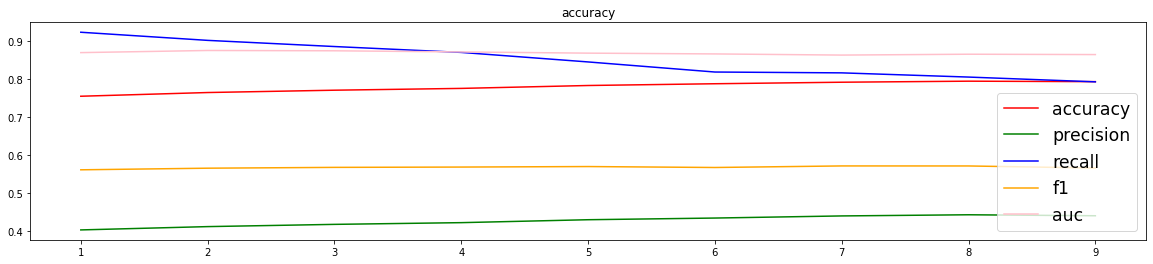

In [68]:
# 学习曲线调参 一般的函数
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

def adjust_lgbc_param(train_x=None, train_y=None, test_x=None, test_y=None, metric='accuracy'):
    Xtrain, Ytrain, Xtest, Ytest = train_x, train_y, test_x, test_y

    acc_train, acc_test = [], []
    pre_train, pre_test = [], []
    recall_train, recall_test = [], []
    f1_train, f1_test = [], []
    auc_train, auc_test = [], []
    map_train, map_test = [], [] 
    # 调优精度
    start, end, step = 1, 10, 1  
    n_cv = 5
    
    for i in range(start,end,step):
        lgbc = LGBMClassifier(
                             boosting_type='gbdt',
                             class_weight='balanced',
                             objective='binary',
                             colsample_bytree=1.0,
                             importance_type='split', # 和feature_importance 配合使用
                             n_estimators=81,
                             learning_rate=0.1,
                             max_depth=i,
                             min_child_samples=20,
                             min_child_weight=0.001,
                             min_split_gain=0.0,
                             num_leaves=31,
                             reg_alpha=0.0,
                             reg_lambda=0.0,
                             silent=True,
                             subsample=1.0,
                             subsample_for_bin=200000,
                             subsample_freq=0)
        score = cross_val_score(lgbc,Xtrain,Ytrain,cv=n_cv, scoring='accuracy').mean()
        acc_train.append(score)
        score = cross_val_score(lgbc,Xtrain,Ytrain,cv=n_cv, scoring='precision').mean()
        pre_train.append(score)
        score = cross_val_score(lgbc,Xtrain,Ytrain,cv=n_cv, scoring='recall').mean()
        recall_train.append(score)
        score = cross_val_score(lgbc,Xtrain,Ytrain,cv=n_cv, scoring='f1').mean()
        f1_train.append(score)
        score = cross_val_score(lgbc,Xtrain,Ytrain,cv=n_cv, scoring='roc_auc').mean()
        auc_train.append(score)

    print('max(accuracy):  %f, index: %d' % (max(acc_train),(acc_train.index(max(acc_train))*step)+1+start))
    print('max(precision): %f, index: %d' % (max(pre_train),(pre_train.index(max(pre_train))*step)+1+start))
    print('max(recall):    %f, index: %d' % (max(recall_train),(recall_train.index(max(recall_train))*step)+1+start))
    print('max(f1):        %f, index: %d' % (max(f1_train),(f1_train.index(max(f1_train))*step)+1+start))
    print('max(roc_auc):   %f, index: %d' % (max(auc_train),(auc_train.index(max(auc_train))*step)+1+start))
    
    fig = plt.figure(figsize=[20,4])
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('accuracy')
    ax.plot(range(start,end,step),acc_train, c="red",label="accuracy")
    ax.plot(range(start,end,step),pre_train, c="green",label="precision")
    ax.plot(range(start,end,step),recall_train, c="blue",label="recall")
    ax.plot(range(start,end,step),f1_train, c="orange",label="f1")
    ax.plot(range(start,end,step),auc_train, c="pink",label="auc")
    ax.legend(fontsize="xx-large")
    plt.show()
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
adjust_lgbc_param(train_x, train_y, val_x, val_y)

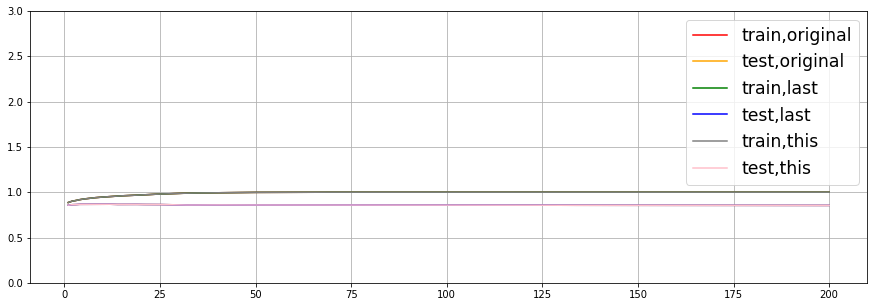

In [70]:
def adjustment_xgb_parameters(x_train=None, y_train=None, fig_ylim=3):
    """x_train, y_train"""
    fig,ax = plt.subplots(1,figsize=(15,5))
    ax.set_ylim(top=fig_ylim)
    ax.grid()

    dfull = xgb.DMatrix(x_train,y_train) 
    # Init parameter
    param1 = {'verbosity':1, # -- global parameter 
              'objective':'binary:logistic',  # -- task parameter
              'eval_metric':'auc',
              "subsample":1,  # -- tree booster parameter
              "max_depth":6,
              "eta":0.3,
              "gamma":0,
              "lambda":1,
              "alpha":0,
              "colsample_bytree":1,
              "colsample_bylevel":1,
              "colsample_bynode":1,
            }
    num_round = 200
    cvresult1 = xgb.cv(params=param1, dtrain=dfull, num_boost_round=num_round,nfold=5)
    ax.plot(range(1,num_round+1),cvresult1.iloc[:,0],c="red",label="train,original")
    ax.plot(range(1,num_round+1),cvresult1.iloc[:,2],c="orange",label="test,original")

    # Usable parameter
    param2 = {'verbosity':1, 
              'objective':'binary:logistic', 
              'eval_metric':'auc'
             }
    num_round = 200
    cvresult2 = xgb.cv(params=param1, dtrain=dfull, num_boost_round=num_round,nfold=5)
    ax.plot(range(1,num_round+1),cvresult2.iloc[:,0],c="green",label="train,last")
    ax.plot(range(1,num_round+1),cvresult2.iloc[:,2],c="blue",label="test,last")

    # Adjusting parameter
    param3 = {'verbosity':1,  
              'objective':'binary:logistic',
              'eval_metric':'auc'
             }
    num_round = 200
    cvresult3 = xgb.cv(params=param1, dtrain=dfull, num_boost_round=num_round,nfold=5)
    ax.plot(range(1,num_round+1),cvresult3.iloc[:,0],c="gray",label="train,this")
    ax.plot(range(1,num_round+1),cvresult3.iloc[:,2],c="pink",label="test,this")
    ax.legend(fontsize="xx-large")
    plt.show()
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
adjustment_xgb_parameters(train_x, train_y)

[100]	training's binary_logloss: 0.155112	valid_1's binary_logloss: 0.299768
[100]	training's binary_logloss: 0.262166	valid_1's binary_logloss: 0.297143
[100]	training's binary_logloss: 0.262166	valid_1's binary_logloss: 0.297143


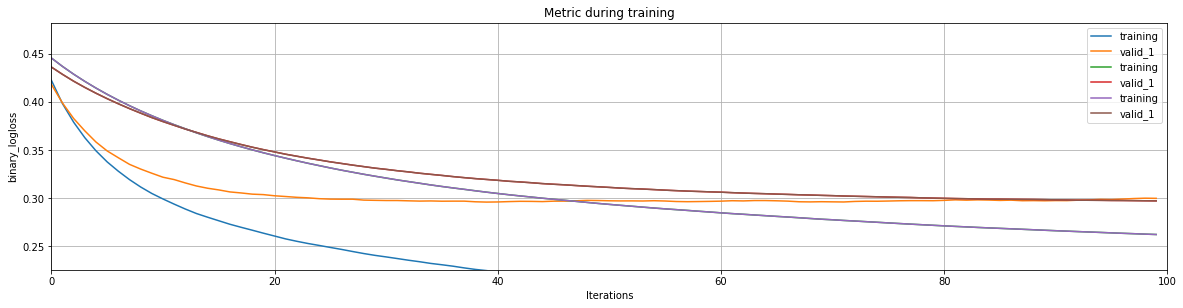

In [72]:
# Adjust the param of lightgbm   use eval_result = {} 
def adjust_lgb_parameters(x_train=None, y_train=None, x_test=None, y_test=None, xlim=None):
    # auc / binary_logloss(binary) / binary_error 
    train_data_l = lgb.Dataset(x_train, label=y_train) 
    valid_data_l = lgb.Dataset(x_test, label=y_test)

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(211)
    xlim = xlim
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'binary_logloss',
        'n_estimators': 100,
    }
    evals_result_ori = {}
    model = lgb.train(params, train_set=train_data_l, verbose_eval=100, valid_sets=[train_data_l, valid_data_l], evals_result=evals_result_ori) 
    lgb.plot_metric(evals_result_ori, metric=params['metric'], ax=ax, xlim=xlim)

    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'binary_logloss',
        'n_estimators': 100,
        'learning_rate': 0.03,
        'num_leaves': 21,
        'reg_alpha': 0.2,
        'reg_lambda': 0.2,
    }
    evals_result_last = {}
    model = lgb.train(params, train_set=train_data_l, verbose_eval=100, valid_sets=[train_data_l, valid_data_l], evals_result=evals_result_last)
    lgb.plot_metric(evals_result_last, metric=params['metric'], ax=ax, xlim=xlim)

    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'binary_logloss',
        'n_estimators': 100,
        'learning_rate': 0.03,
        'num_leaves': 21,
        'reg_alpha': 0.2,
        'reg_lambda': 0.2,
        'subsample': 0.5
    }
    evals_result_this = {}
    model = lgb.train(params, train_set=train_data_l, verbose_eval=100, valid_sets=[train_data_l, valid_data_l], evals_result=evals_result_this)
    lgb.plot_metric(evals_result_this, metric=params['metric'], ax=ax, xlim=xlim)
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
adjust_lgb_parameters(train_x, train_y, val_x, val_y)

### 4.2 自动调参
1. 网格搜索
2. 随机搜索
3. 贝叶斯优化

In [73]:
# 网格搜索
# Fitting 3 folds for each of 300000 candidates, totalling 900000 fits
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
import warnings
warnings.filterwarnings('ignore')

parameters = {
#     'n_estimators': [500, 1000, 2000, 3000, 5000],
#     'num_leaves': [10,20.30,40,50],
#     'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
    'max_depth': [5, 10],  # default = 31 [5, 10, 15, 20, 25]
#     'min_child_weight': [0, 2, 5, 10, 20],
#     'max_delta_step': [0, 0.2, 0.6, 1, 2],
#     'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
#     'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
#     'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
#     'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
}

lgbc = lgb.LGBMClassifier(
                        max_depth=10,
                        learning_rate=0.01,
                        n_estimators=100,
                        silent=True,
                        objective='binary',
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=0.85,
                        colsample_bytree=0.7,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=1440,
                        num_threads=-1,
                        verbosity=-1
                       )
# Scoring options: [accuracy, f1, precision, recall, roc_auc]
# https://scikit-learn.org/0.22/modules/model_evaluation.html#scoring-parameter
gsearch = GridSearchCV(lgbc, param_grid=parameters, scoring='f1', cv=3, verbose=3, return_train_score=False)
gsearch.fit(train_x, train_y) # traditional train_x / train_y


print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print('Best estimator:\n', gsearch.best_estimator_)

# print('详细结果:\n', pd.DataFrame.from_dict(gsearch.cv_results_))
# print('最佳分数:\n', gsearch.best_score_)
# print('最佳参数:\n', gsearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ....................................max_depth=5; total time=   0.2s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 2/3] END ....................................max_depth=5; total time=   0.2s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 3/3] END ....................................max_depth=5; total time=   0.3s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 1/3] END ...................................max_depth=10; total time=   0.4s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 2/3] END ...................................max_depth=10; total time=   0.3s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 3/3] END ..................

In [74]:
# 随机搜索
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV

parameters = {
#     'n_estimators': [500, 1000, 2000, 3000, 5000],
#     'num_leaves': [10,20.30,40,50],
#     'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
    'max_depth': [5, 10],  # default = 31 [5, 10, 15, 20, 25]
#     'min_child_weight': [0, 2, 5, 10, 20],
#     'max_delta_step': [0, 0.2, 0.6, 1, 2],
#     'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
#     'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
#     'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
#     'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
}

lgbc = lgb.LGBMClassifier(
                        max_depth=10,
                        learning_rate=0.01,
                        n_estimators=100,
                        silent=True,
                        objective='binary',
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=0.85,
                        colsample_bytree=0.7,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=1440,
                        num_threads=-1,
                        verbosity=-1
                       )
rand_ser = RandomizedSearchCV(lgbc, param_distributions=parameters, scoring='f1', cv=3, verbose=3)
rand_ser.fit(train_x, train_y)

print("Best score: %0.3f" % rand_ser.best_score_)
print("Best parameters set:")
best_parameters = rand_ser.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print('Best estimator_:\n', rand_ser.best_estimator_)

# print('详细结果:\n', pd.DataFrame.from_dict(rand_ser.cv_results_))
# print('最佳分数:\n', rand_ser.best_score_)
# print('最佳参数:\n', rand_ser.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ....................................max_depth=5; total time=   0.2s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 2/3] END ....................................max_depth=5; total time=   0.2s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 3/3] END ....................................max_depth=5; total time=   0.3s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 1/3] END ...................................max_depth=10; total time=   0.4s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 2/3] END ...................................max_depth=10; total time=   0.4s
[LightGBM] [Warning] num_threads is set=-1, n_jobs=-1 will be ignored. Current value: num_threads=-1
[CV 3/3] END ..................

In [ ]:
# bayes调参初探
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

def lgbc_cv(n_estimators, max_depth,learning_rate,min_child_weight,max_delta_step,subsample,colsample_bytree,reg_alpha,reg_lambda,scale_pos_weight):
    val = cross_val_score(
        lgb.LGBMClassifier(max_depth=int(max_depth),
            learning_rate=min(learning_rate,0.3),
            n_estimators=int(n_estimators),
            #silent=True,
            verbose=4,
            objective='binary',         
            min_child_weight=int(min_child_weight),
            max_delta_step=int(max_delta_step),
            subsample=min(subsample,0.95),
            colsample_bytree=min(colsample_bytree,0.95),
            reg_alpha=min(reg_alpha,1),
            reg_lambda=min(reg_lambda,1),
            scale_pos_weight=min(scale_pos_weight,1),
            seed=1440),
        train_x, train_y, scoring='roc_auc', cv=5
    ).mean()
    return val 

lgbc_bo = BayesianOptimization(
        lgbc_cv,
        {
              'max_depth': (5,100),
              'learning_rate': (0.001,0.3),
              'n_estimators': (500,5000),
              'min_child_weight': (0,20),
              'max_delta_step': (0,2),
              'subsample': (0.1,0.99),
              'colsample_bytree': (0.1,0.99),
              'reg_alpha': (0,1),
              'reg_lambda': (0,1),
              'scale_pos_weight': (0,1)

}
    )
lgbc_bo.maximize(n_iter=5) # 100
lgbc_bo.max

## 5. 模型集成

## 6. 模型持久化

In [75]:
# 程序持久化
import joblib
import os
# 保存模型
save_path = 'model.pkl'
joblib.dump(model, save_path)
# 加载模型
path = os.getcwd()
model = joblib.load(path+'/model.pkl')